<a href="https://colab.research.google.com/github/tigerjk726/Bumjoong/blob/main/Typhoon_modeling(added_other_country)_20221127_6~11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DATA

In [1]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')             

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon

/content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon


In [3]:
import pandas as pd
df = pd.read_csv('summary4.csv')
df

,DATE,YEAR,MON,AAO,AMO,AO,EMI,GMT,NINO3,NINO4,PDO,PNA,QBO,CNT,FREG,INTEN
0,198001,1980,1,2468.847,-0.251,-13914.348,0.468,-0.008,0.362,0.318,0.688,-0.787,-1.147,0,0,0.0
1,198002,1980,2,5287.235,-0.265,-7920.162,0.573,0.048,0.025,0.311,1.233,1.002,3.094,0,0,0.0
2,198003,1980,3,18067.714,-0.343,-9798.327,0.417,0.005,-0.153,0.166,1.107,-0.539,5.553,0,0,0.0
3,198004,1980,4,23780.651,-0.064,-4271.158,0.394,0.035,-0.189,0.107,1.255,1.457,11.231,0,0,0.0
4,198005,1980,5,3995.642,0.046,-8602.326,0.369,0.072,-0.155,0.201,1.204,0.377,18.477,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8359,202008,2020,8,8954.542,0.263,-1599.950,-0.229,0.320,-0.558,-0.237,-1.413,-0.156,20.514,16,0,0.0
8360,202009,2020,9,4960.132,0.135,4138.498,-0.207,0.435,-0.918,-0.463,-1.137,0.402,20.357,16,1,40.0
8361,202010,2020,10,-10689.321,0.129,662.580,-0.377,0.416,-1.043,-0.695,-0.612,-0.943,19.270,16,4,56.0
8362,202011,2020,11,-13940.175,0.026,16778.709,-0.441,0.519,-1.136,-0.792,-1.451,-0.402,18.811,16,3,64.0


1. 학습(Train, test) 데이터셋 (8364개)  : X Feature(14개), Y Feature(2개)

> 들여쓴 블록

> 들여쓴 블록





2. 변수는 'DATE', 'YEAR' 를 제외한  'MON', 'AAO', 'AMO', 'AO', 'EMI', 'GMT', 'NINO3', 'NINO4', 'PDO', 'PNA', 'QBO', 'CNT' 총 12개를 기준

3. 각 나라별 통계치가 일정치 않아서 1980 ~ 2020까지의 데이터를 기준으로 전처리함

4. 나라별로 CNT에 코드지정 
0 ; korea
1 ; Carribean_TC
2 ; Bangla_TC
3 ; CHINA_TC
4 ; East_US
5 ; India_TC_
6 ; JAPAN_TC
7 ; Mexico_TC_freq_NHC-ENP
8 ; Mexico_TC_freq_NHC-NAT
9 ; Myanmar_TC_freq_JTWC-NIO
10 ; Pakistan_TC
11 ; PHILI_TC_
12 ; Sri_TC
13 ; TAIWAN_TC
14 ; US_TC_freq_NHC-ENP
15 ; US_TC_freq_NHC-NAT
16 ; Vietnam_TC_

5. 모델링 
 - 1. 한국데이터만 사용
 - 2. 전체데이터 사용

칼럼별 명칭

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df.columns

Index(['DATE', 'YEAR', 'MON', 'AAO', 'AMO', 'AO', 'EMI', 'GMT', 'NINO3',
       'NINO4', 'PDO', 'PNA', 'QBO', 'CNT', 'FREG', 'INTEN'],
      dtype='object')

In [ ]:
df.groupby("YEAR").mean()["FREG"]

In [ ]:
df.groupby("YEAR").mean()["INTEN"]

In [ ]:
df['INTEN'] = df['INTEN'].astype(np.int64)
df.info()

# Data Splitting


In [44]:
df1 = df[df["MON"].isin([6,7,8,9,10,11])]

# All Conutry 67891011
X = df1.iloc[:,2:14]
Y = df1.iloc[:,14:]
Y1 = df1['FREG']
Y2 = df1['INTEN']

# Korea 67891011
df2 = df1[df1["CNT"].isin([0])]
X_korea = df2.iloc[:,2:14]
Y_korea1 = df2['FREG']
Y_korea2 = df2['INTEN']
print(X_korea, Y_korea1, Y_korea2)

# Korea 
df3 = df[df["CNT"].isin([0])]
X_korea1 = df3.iloc[:,2:14]
Y_korea3 = df3['FREG']
Y_korea4 = df3['INTEN']

     MON        AAO    AMO         AO    EMI    GMT  NINO3  NINO4    PDO  \
5      6  -5755.125 -0.011   5854.573  0.332 -0.024  0.059  0.104 -0.282   
6      7  26895.281 -0.084  -3503.817  0.357  0.009 -0.240 -0.014  0.204   
7      8   8098.580 -0.080   -608.816 -0.085 -0.037 -0.335 -0.313  0.219   
8      9  15792.082 -0.140   2012.419 -0.041 -0.069 -0.176 -0.290  0.126   
9     10  -9940.679 -0.164  -4343.394  0.223 -0.118 -0.410 -0.067  1.358   
..   ...        ...    ...        ...    ...    ...    ...    ...    ...   
486    7  13366.147  0.180  -2349.840  0.101  0.354 -0.525  0.041 -1.102   
487    8   8954.542  0.263  -1599.950 -0.229  0.320 -0.558 -0.237 -1.413   
488    9   4960.132  0.135   4138.498 -0.207  0.435 -0.918 -0.463 -1.137   
489   10 -10689.321  0.129    662.580 -0.377  0.416 -1.043 -0.695 -0.612   
490   11 -13940.175  0.026  16778.709 -0.441  0.519 -1.136 -0.792 -1.451   

       PNA     QBO  CNT  
5   -0.666  21.490    0  
6   -0.559  21.300    0  
7   -1.07

In [12]:
!pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [13]:
import pandas
import numpy as np
import pandas as pd
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, LSTM, InputLayer
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

# K-Fold Cross-Validation and Leave-One-Out Cross-Validation

## : An important factor when choosing between the k-fold and the LOO cross-validation methods is the size of the dataset. https://www.baeldung.com/cs/cross-validation-k-fold-loo

# Korea + LeaveoneOut

1.   Frequency 예측



In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


cv = LeaveOneOut()

model = RandomForestClassifier(random_state=1)
model.fit(X_korea,Y_korea1)

# evaluate model
scores = cross_val_score(model, X_korea, Y_korea1, scoring='accuracy', cv=cv, n_jobs=-1)

from numpy import mean
from numpy import std
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.654 (0.476)


2. Intensity 예측

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


model2 = RandomForestClassifier(random_state=1)
model2.fit(X_korea,Y_korea2)

# evaluate model
scores = cross_val_score(model2, X_korea, Y_korea2, scoring='accuracy', cv=cv, n_jobs=-1)

from numpy import mean
from numpy import std
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.663 (0.473)


In [67]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_korea, Y_korea1)
rf.feature_importances_

array([0.18666421, 0.05655512, 0.14773338, 0.0601594 , 0.10560252,
       0.07511934, 0.08258159, 0.06608676, 0.05871118, 0.0532886 ,
       0.1074979 , 0.        ])

Text(0.5, 0, 'Random Forest Feature Importance')

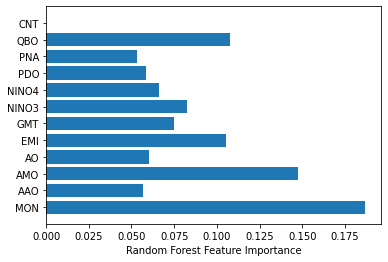

In [68]:
feature_cols = X_korea.columns[:]
plt.barh(feature_cols, rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

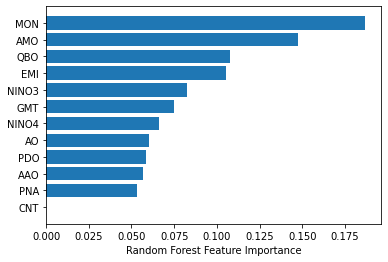

In [69]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(feature_cols[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Permutation Importance')

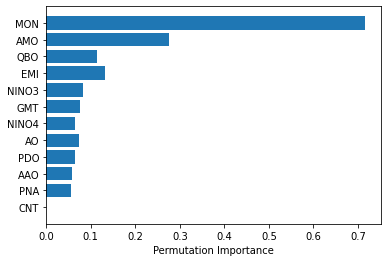

In [70]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_korea, Y_korea1)
plt.barh(feature_cols[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

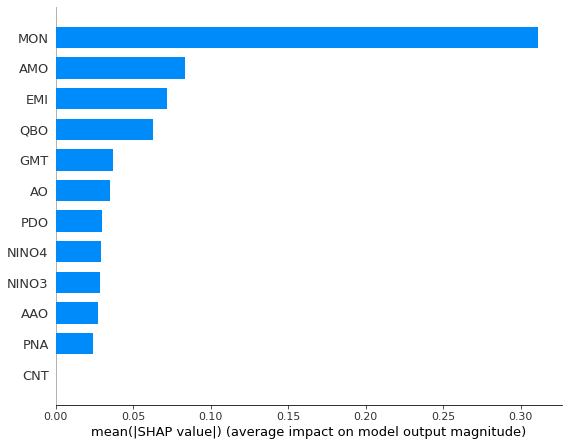

In [71]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_korea)
shap.summary_plot(shap_values, X_korea, feature_cols, plot_type="bar")

In [72]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_korea, Y_korea2)
rf.feature_importances_

array([0.23704575, 0.07829   , 0.07313313, 0.10738138, 0.09042422,
       0.07060206, 0.05441398, 0.05380753, 0.06479494, 0.07225357,
       0.09785343, 0.        ])

Text(0.5, 0, 'Random Forest Feature Importance')

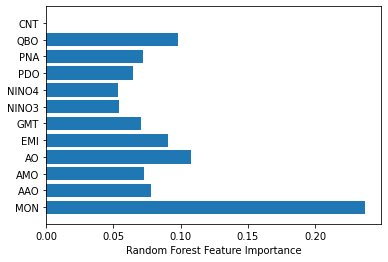

In [73]:
feature_cols = X_korea.columns[:]
plt.barh(feature_cols, rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

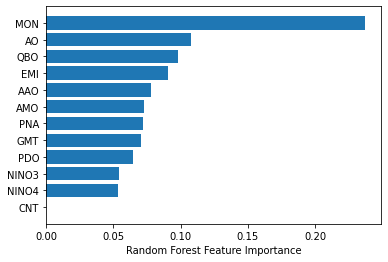

In [74]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(feature_cols[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Permutation Importance')

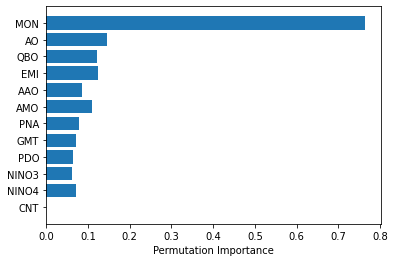

In [75]:
perm_importance = permutation_importance(rf, X_korea, Y_korea2)
plt.barh(feature_cols[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [77]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


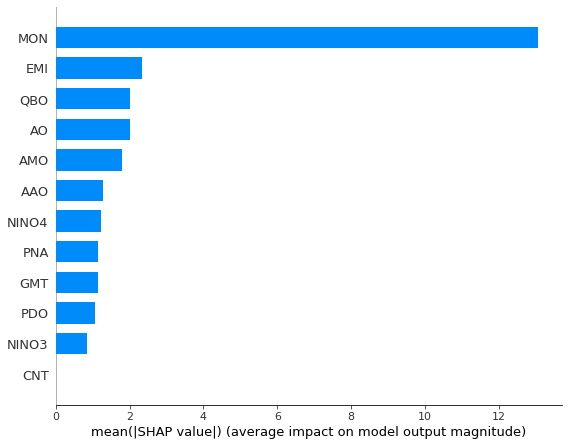

In [76]:

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_korea)
shap.summary_plot(shap_values, X_korea, feature_cols, plot_type="bar")

# All country + Cross Validation(KFold)
## XGBclassifier
 ## - Freguency


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

train_x, test_x, train_y, test_y = train_test_split(X, Y1, test_size=0.3)

xgbc = XGBClassifier()
xgbc.fit(train_x, train_y)

kfold = KFold(n_splits=50, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, train_x, train_y, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.63


 ## - Intensity

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

train_x2, test_x2, train_y2, test_y2 = train_test_split(X, Y2, test_size=0.3)

xgbc2 = XGBClassifier()
xgbc2.fit(train_x2, train_y2)

kfold = KFold(n_splits=30, shuffle=True)
kf_cv_scores = cross_val_score(xgbc2, train_x2, train_y2, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.62


In [43]:
prediction2 = xgbc2.predict(test_x2)

scores = accuracy_score(test_y2,prediction2)
scores

0.6207171314741036

# predict

In [45]:
prediction1 = xgbc.predict(X_korea1)
scores1 = accuracy_score(Y_korea3,prediction1)

prediction2 = xgbc2.predict(X_korea1)
scores2 = accuracy_score(Y_korea4,prediction2)

print("Korea Frequency prediction : %.2f" % scores1)
print("Korea Intensity prediction : %.2f" % scores2)

Korea Frequency prediction : 0.84
Korea Intensity prediction : 0.84


In [46]:
prediction1 = pd.DataFrame(prediction1)
prediction2 = pd.DataFrame(prediction2)

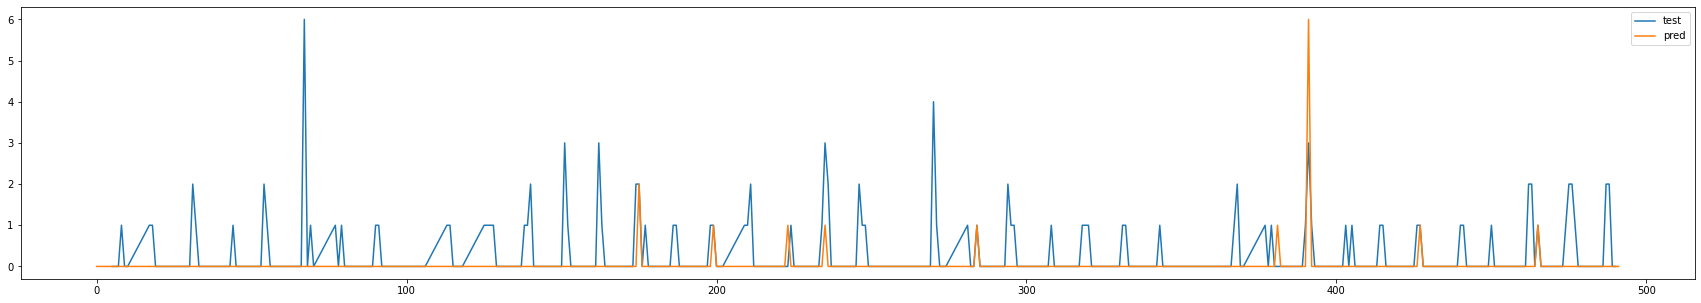

In [47]:
plt.figure(figsize=(30,5))

ax1=Y_korea1.plot()
prediction1.plot(ax=ax1)
plt.legend(['test','pred'])

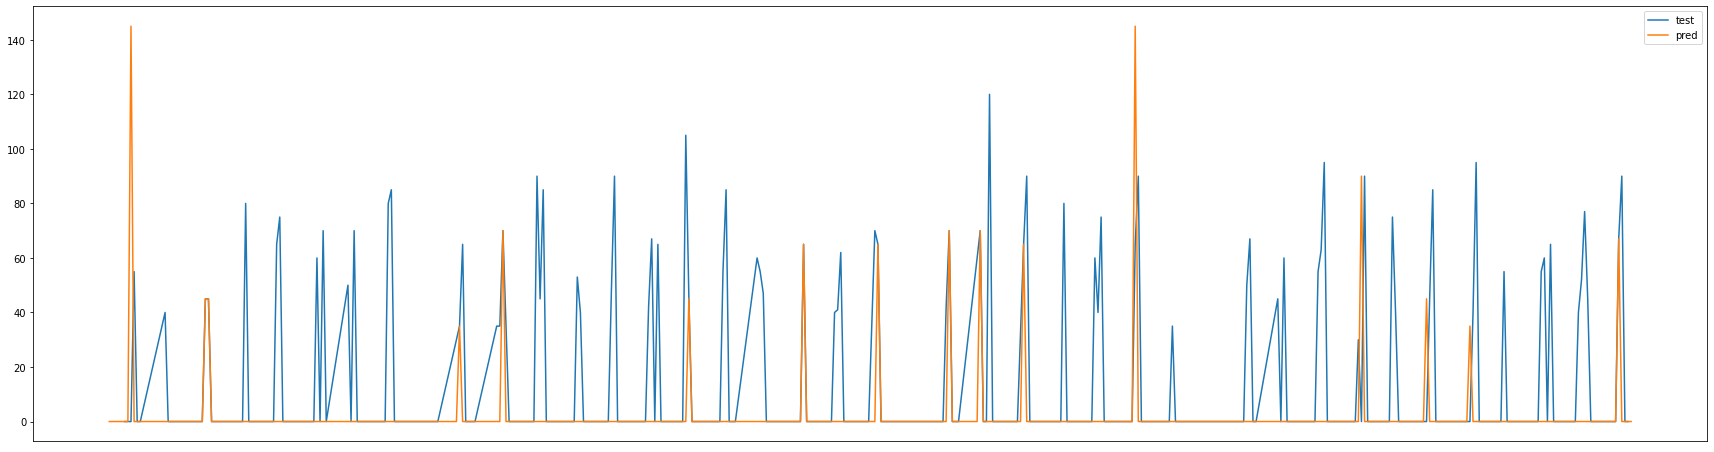

In [48]:
df1 = df[df["CNT"].isin([0])]

plt.figure(figsize=(30,8))
xlabels = df1['DATE']
plt.xticks(ticks=xlabels,labels=xlabels,rotation=45)
plt.locator_params(axis='x', nbins=len(xlabels)/2)

ax1=Y_korea2.plot()
prediction2.plot(ax=ax1)
plt.legend(['test','pred'])